# Dynamic User Profile for Content Recommendation

This notebook explains how to dynamically update user interests based on interactions and how to select content to recommend. The process includes updating interests with likes, shares, and normalized view time, applying decay to interests over time, and selecting top interests.

## Step 1: Initialization

We start by defining the `UserProfile` class with an empty list of interests.


In [34]:
import random
import matplotlib.pyplot as plt
import pandas as pd

class UserProfile:
    def __init__(self):
        """
        Initializes a new UserProfile with an empty interests dictionary,
        sets the maximum weight for any interest, probability for random content,
        decay rate, and maximum view time for normalization.
        """
        self.interests = {}
        self.max_interest_weight = 50
        self.random_content_probability = 0.5
        self.decay_rate = 0.95  # Decay factor for interests
        self.max_view_time = 300  # Assume max view time for normalization is 300 seconds (5 minutes)


### Explanation:

- **`self.interests`**: A dictionary to store the user's interests and their corresponding weights.
- **`self.max_interest_weight`**: The maximum weight any single interest can have.
- **`self.random_content_probability`**: The probability of showing random content (e.g., 50%).
- **`self.decay_rate`**: The rate at which interests decay over time (e.g., 0.95 means a 5% reduction per update).
- **`self.max_view_time`**: The maximum view time used for normalizing the view time (e.g., 300 seconds or 5 minutes).


## Step 2: Updating Interests Based on Interactions

We define a method to update the user's interests based on interactions like likes, shares, and view time.


In [35]:
    def update_interest(self, interest, likes=0, shares=0, view_time=0):
        """
        Updates the weight of a given interest based on the user's interactions
        (likes, shares, view time). It also applies decay to all interests and
        normalizes the weights if their total exceeds 100%.

        Parameters:
        - interest (str): The tag representing the interest to be updated.
        - likes (int): The number of likes for the interest.
        - shares (int): The number of shares for the interest.
        - view_time (int): The view time in seconds for the interest.
        """
        if interest not in self.interests:
            self.interests[interest] = 0

        # Normalize view time
        normalized_view_time = view_time / self.max_view_time

        # Decay existing interests
        for key in self.interests:
            self.interests[key] *= self.decay_rate

        # Update weight based on interactions
        weight_increase = (likes * 0.1) + (shares * 0.2) + (normalized_view_time * 5)
        new_weight = min(self.interests[interest] + weight_increase, self.max_interest_weight)
        self.interests[interest] = new_weight

        # Normalize weights if they exceed 100%
        total_weight = sum(self.interests.values())
        if total_weight > 100:
            scale_factor = 100 / total_weight
            for key in self.interests:
                self.interests[key] *= scale_factor


### Explanation:

- **Adding a New Interest**:
  - If the `interest` is not already in `self.interests`, it's added with an initial weight of `0`.

- **Normalizing View Time**:
  - The view time is normalized by dividing the `view_time` by `self.max_view_time`.
  - Example: If `view_time` is 120 seconds and `self.max_view_time` is 300 seconds, `normalized_view_time` is `120 / 300 = 0.4`.

- **Applying Decay**:
  - Every time we update interests, we apply a decay factor to all existing interests.
  - Example: If the current weight of "Python" is `10` and `self.decay_rate` is `0.95`, the new weight is `10 * 0.95 = 9.5`.

- **Updating Weights Based on Interactions**:
  - The weight increase is calculated based on likes, shares, and normalized view time.
  - Formula: `weight_increase = (likes * 0.1) + (shares * 0.2) + (normalized_view_time * 5)`
  - Example: If an interest receives `5` likes, `3` shares, and has a `normalized_view_time` of `0.4`, the weight increase is `(5 * 0.1) + (3 * 0.2) + (0.4 * 5) = 0.5 + 0.6 + 2 = 3.1`.
  - The new weight is the sum of the current weight and the weight increase, capped at `self.max_interest_weight`.
  - Example: If the current weight is `7` and the weight increase is `3.1`, the new weight is `min(7 + 3.1, 50) = 10.1`.

- **Normalizing Total Weight**:
  - If the sum of all weights exceeds `100`, all weights are scaled down proportionally.
  - Example: If the total weight is `120` and an individual interest's weight is `15`, the new weight is `(15 / 120) * 100 = 12.5`.


## Step 3: Getting Top Interests

We define a method to get the top 3 interests based on their weights.


In [36]:
    def get_top_interests(self):
        """
        Returns a list of the top 3 interests sorted by their weights in descending order.
        """
        # Select top 3 interests
        sorted_interests = sorted(self.interests.items(), key=lambda item: item[1], reverse=True)
        top_interests = sorted_interests[:3]
        return [interest for interest, weight in top_interests]


### Explanation:

- **Sorting Interests**:
  - Interests are sorted by their weights in descending order.
  - Example: If the interests are `{'Python': 10, 'AI': 7, 'Biology': 8}`, they are sorted to `[('Python', 10), ('Biology', 8), ('AI', 7)]`.

- **Selecting Top 3**:
  - The top 3 interests are selected from the sorted list.
  - Example: From `[('Python', 10), ('Biology', 8), ('AI', 7)]`, the top 3 are `['Python', 'Biology', 'AI']`.


## Step 4: Deciding on Random Content

We define a method to decide whether to show random content based on a fixed probability.


In [37]:
    def should_show_random_content(self):
        """
        Returns True if random content should be shown based on a fixed probability.
        """
        return random.random() < self.random_content_probability

### Explanation:

- **Random Content Decision**:
  - A random number between 0 and 1 is generated.
  - If this number is less than `self.random_content_probability`, random content is shown.
  - Example: If `self.random_content_probability` is `0.5`, there's a `50%` chance of showing random content.

## Step 5: Getting the Next Content Type

We define a method to get the next content type, either one of the top interests or random content.

In [38]:
    def get_next_content_type(self):
        """
        Returns the next content type to display. It can be 'Random' or one of the top interests.
        """
        if self.should_show_random_content():
            return 'Random'
        else:
            return random.choice(self.get_top_interests())

# Create a new user profile instance
user_profile = UserProfile()


### Explanation:

- **Random Content Check**:
  - We use the `should_show_random_content` method to decide if random content should be shown.

- **Selecting Top Interest**:
  - If random content is not selected, one of the top interests is chosen randomly.
  - Example: If the top interests are `['Python', 'Biology', 'AI']`, one of these is chosen randomly.


## Step 6: Simulating User Interactions

We simulate user interactions with different tags and track the changes in interests.


In [39]:
# Simulate user interactions
interactions = [
    ('Python', 5, 3, 120),  # viewed for 120 seconds
    ('AI', 2, 1, 60),       # viewed for 60 seconds
    ('Biology', 3, 2, 90),  # viewed for 90 seconds
    ('Math', 1, 2, 30),     # viewed for 30 seconds
    ('History', 2, 1, 45),  # viewed for 45 seconds
]

# Track the changes for visualization
history = []

for tag, likes, shares, view_time in interactions:
    user_profile.update_interest(tag, likes, shares, view_time)
    # Save the current state for visualization
    history.append(user_profile.interests.copy())
    print(f"After interaction with {tag}:")
    print(f"Interests: {user_profile.interests}")
    print(f"Top Interests: {user_profile.get_top_interests()}")


AttributeError: 'UserProfile' object has no attribute 'update_interest'

## Step 7: Visualizing Interest Changes Over Time

We visualize the changes in user interests over time to see how they evolve with each interaction.


In [ ]:
# Prepare data for visualization
df = pd.DataFrame(history)
df = df.fillna(0)  # Fill NaN with 0 for plotting

# Plot the data
plt.figure(figsize=(12, 6))
for column in df.columns:
    plt.plot(df[column], label=column)

plt.title("User Interests Over Time")
plt.xlabel("Interaction Step")
plt.ylabel("Interest Weight")
plt.legend()
plt.show()


## Step 8: Deciding the Next Content Type

We decide whether to show random content based on a fixed probability or select from the top interests.


In [ ]:
# Get next content type to display
next_content_type = user_profile.get_next_content_type()
print("Next content type:", next_content_type)


## Summary

- **Initialization**: We start with no interests and dynamically add them based on user interactions.
- **Interactions**: Each interaction updates the weight of the corresponding tag.
- **Decay Mechanism**: Interests that are not interacted with decay over time.
- **Normalization**: Ensuring total weight does not exceed 100%.
- **Top Interests**: Selecting the top 3 interests based on weights.
- **Random Content Decision**: Sometimes showing random content to keep recommendations diverse.

This notebook demonstrates a dynamic user profile that evolves based on user interactions and provides a flexible recommendation system.


___

After interaction with Python:
Interests: {'Python': 3.433333333333333}
Top Interests: ['Python']
Next content type: Random 

After interaction with AI:
Interests: {'Python': 3.2616666666666663, 'AI': 1.8666666666666665}
Top Interests: ['Python', 'AI']
Next content type: Random 

After interaction with Biology:
Interests: {'Python': 3.098583333333333, 'AI': 1.773333333333333, 'Biology': 2.5}
Top Interests: ['Python', 'Biology', 'AI']
Next content type: AI 

After interaction with Math:
Interests: {'Python': 2.9436541666666662, 'AI': 1.6846666666666663, 'Biology': 2.375, 'Math': 0.9333333333333332}
Top Interests: ['Python', 'Biology', 'AI']
Next content type: Biology 

After interaction with History:
Interests: {'Python': 2.796471458333333, 'AI': 1.600433333333333, 'Biology': 2.25625, 'Math': 0.8866666666666665, 'History': 1.45}
Top Interests: ['Python', 'Biology', 'AI']
Next content type: Python 

After interaction with Python:
Interests: {'Python': 3.3122034409722216, 'AI': 1.52041166

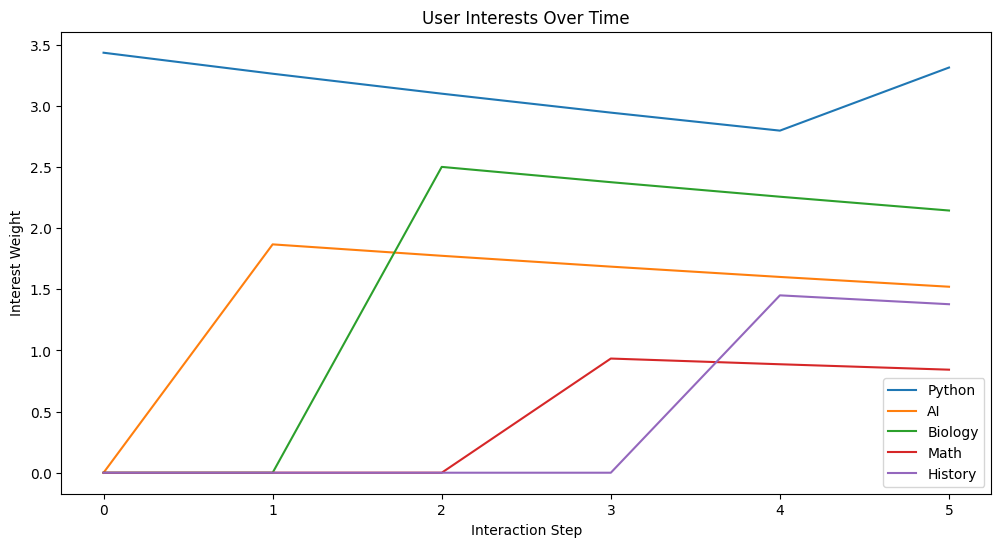

In [40]:
import random
import matplotlib.pyplot as plt
import pandas as pd
import time

class UserProfile:
    def __init__(self):
        """
        Initializes a new UserProfile with an empty interests dictionary,
        sets the maximum weight for any interest, probability for random content,
        decay rate, and maximum view time for normalization.
        """
        self.interests = {}
        self.max_interest_weight = 50
        self.random_content_probability = 0.5
        self.decay_rate = 0.95  # Decay factor for interests
        self.max_view_time = 180  # Assume max view time for normalization is 300 seconds (5 minutes)

    def update_interest(self, interest, likes=0, shares=0, view_time=0):
        """
        Updates the weight of a given interest based on the user's interactions
        (likes, shares, view time). It also applies decay to all interests and
        normalizes the weights if their total exceeds 100%.

        Parameters:
        - interest (str): The tag representing the interest to be updated.
        - likes (int): The number of likes for the interest.
        - shares (int): The number of shares for the interest.
        - view_time (int): The view time in seconds for the interest.
        """
        if interest not in self.interests:
            self.interests[interest] = 0

        # Normalize view time
        normalized_view_time = view_time / self.max_view_time

        # Decay existing interests
        for key in self.interests:
            self.interests[key] *= self.decay_rate

        # Update weight based on interactions
        weight_increase = (likes * 0.1) + (shares * 0.2) + (normalized_view_time * 5)
        new_weight = min(self.interests[interest] + weight_increase, self.max_interest_weight)
        self.interests[interest] = new_weight

        # Normalize weights if they exceed 100%
        total_weight = sum(self.interests.values())
        if total_weight > 100:
            scale_factor = 100 / total_weight
            for key in self.interests:
                self.interests[key] *= scale_factor

    def get_top_interests(self):
        """
        Returns a list of the top 3 interests sorted by their weights in descending order.
        """
        # Select top 3 interests
        sorted_interests = sorted(self.interests.items(), key=lambda item: item[1], reverse=True)
        top_interests = sorted_interests[:3]
        return [interest for interest, weight in top_interests]

    def should_show_random_content(self):
        """
        Returns True if random content should be shown based on a fixed probability.
        """
        return random.random() < self.random_content_probability

    def get_next_content_type(self):
        """
        Returns the next content type to display. It can be 'Random' or one of the top interests.
        """
        if self.should_show_random_content():
            return 'Random'
        else:
            return random.choice(self.get_top_interests())

# Create a new user profile instance
user_profile = UserProfile()

# Simulate user interactions
interactions = [
    ('Python', 1, 0, 120),  # viewed for 120 seconds
    ('AI', 0, 1, 60),       # viewed for 60 seconds
    ('Biology', 0, 0, 90),  # viewed for 90 seconds
    ('Math', 1, 0, 30),     # viewed for 30 seconds
    ('History', 0, 1, 45),  # viewed for 45 seconds
    ('Python', 1, 0, 20),  # viewed for 20 seconds
]

# Track the changes for visualization
history = []

for tag, likes, shares, view_time in interactions:
    user_profile.update_interest(tag, likes, shares, view_time)
    # Save the current state for visualization
    history.append(user_profile.interests.copy())
    print(f"After interaction with {tag}:")
    print(f"Interests: {user_profile.interests}")
    print(f"Top Interests: {user_profile.get_top_interests()}")
    next_content_type = user_profile.get_next_content_type()
    print("Next content type:", next_content_type, "\n")
    time.sleep(1)


# Prepare data for visualization
df = pd.DataFrame(history)
df = df.fillna(0)  # Fill NaN with 0 for plotting

# Plot the data
plt.figure(figsize=(12, 6))
for column in df.columns:
    plt.plot(df[column], label=column)

plt.title("User Interests Over Time")
plt.xlabel("Interaction Step")
plt.ylabel("Interest Weight")
plt.legend()
plt.show()

___

In [ ]:
import random
import matplotlib.pyplot as plt
import pandas as pd

class UserProfile:
    def __init__(self):
        """
        Initializes a new UserProfile with an empty interests dictionary,
        sets the maximum weight for any interest, probability for random content,
        decay rate, and maximum view time for normalization.
        """
        self.interests = {}
        self.max_interest_weight = 50
        self.random_content_probability = 0.5
        self.decay_rate = 0.95  # Decay factor for interests
        self.max_view_time = 300  # Assume max view time for normalization is 300 seconds (5 minutes)

    def update_interest(self, interest, likes=0, shares=0, view_time=0):
        """
        Updates the weight of a given interest based on the user's interactions
        (likes, shares, view time). It also applies decay to all interests and
        normalizes the weights if their total exceeds 100%.

        Parameters:
        - interest (str): The tag representing the interest to be updated.
        - likes (int): The number of likes for the interest.
        - shares (int): The number of shares for the interest.
        - view_time (int): The view time in seconds for the interest.
        """
        if interest not in self.interests:
            self.interests[interest] = 0

        # Normalize view time
        normalized_view_time = view_time / self.max_view_time

        # Decay existing interests
        for key in self.interests:
            self.interests[key] *= self.decay_rate

        # Update weight based on interactions
        weight_increase = (likes * 0.1) + (shares * 0.2) + (normalized_view_time * 5)
        new_weight = min(self.interests[interest] + weight_increase, self.max_interest_weight)
        self.interests[interest] = new_weight

        # Normalize weights if they exceed 100%
        total_weight = sum(self.interests.values())
        if total_weight > 100:
            scale_factor = 100 / total_weight
            for key in self.interests:
                self.interests[key] *= scale_factor

    def get_top_interests(self):
        """
        Returns a list of the top 3 interests sorted by their weights in descending order.
        """
        # Select top 3 interests
        sorted_interests = sorted(self.interests.items(), key=lambda item: item[1], reverse=True)
        top_interests = sorted_interests[:3]
        return [interest for interest, weight in top_interests]

    def should_show_random_content(self):
        """
        Returns True if random content should be shown based on a fixed probability.
        """
        return random.random() < self.random_content_probability

    def get_next_content_type(self):
        """
        Returns the next content type to display. It can be 'Random' or one of the top interests.
        """
        if self.should_show_random_content():
            return 'Random'
        else:
            return random.choice(self.get_top_interests())

# Create a new user profile instance
user_profile = UserProfile()

# Load the CSV data
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vSAE2tBAnAdXsxk9a9YClFN7MSEVhzEmJD01ewwtooMLxL-Ilod26EbdD8sZeZk0ybiqD-jqT-9RZbn/pub?gid=497214901&single=true&output=csv"
df = pd.read_csv(url)
print("Data loaded successfully")

# Print column names
print(df.columns)

def fetch_next_video(df):
    """
    Fetches the next video from the DataFrame, displays its details,
    and simulates interactions with it.

    Parameters:
    - df (DataFrame): The DataFrame containing video data.

    Returns:
    - video (Series): The row representing the video.
    - df (DataFrame): The DataFrame with the fetched video removed.
    """
    if df.empty:
        print("No more videos to display")
        return None, df

    video = df.iloc[0]
    df = df.iloc[1:].reset_index(drop=True)

    # Display video details
    print(f"Title: {video['title']}")
    print(f"Tags: {video['tags']}")
    print(f"Likes: {video['likes']}, Shares: {video['shares']}, View Time: {video['view_time']} seconds")

    return video, df

# Fetch and display the next video
video, df = fetch_next_video(df)

def update_user_profile(user_profile, video):
    """
    Updates the user profile based on the interactions with the fetched video.

    Parameters:
    - user_profile (UserProfile): The user profile object.
    - video (Series): The row representing the video.
    """
    tags = video['tags'].split(', ')
    likes = video['likes']
    shares = video['shares']
    view_time = video['view_time']

    for tag in tags:
        user_profile.update_interest(tag, likes, shares, view_time)

    print(f"Updated Interests: {user_profile.interests}")
    print(f"Top Interests: {user_profile.get_top_interests()}")

# Update the user profile with the fetched video
update_user_profile(user_profile, video)

# Prepare data for visualization
history = [user_profile.interests.copy()]

# Fetch and update for a few more videos to visualize changes
for _ in range(5):
    video, df = fetch_next_video(df)
    if video is not None:
        update_user_profile(user_profile, video)
        history.append(user_profile.interests.copy())

df_history = pd.DataFrame(history)
df_history = df_history.fillna(0)  # Fill NaN with 0 for plotting

# Plot the data
plt.figure(figsize=(12, 6))
for column in df_history.columns:
    plt.plot(df_history[column], label=column)

plt.title("User Interests Over Time")
plt.xlabel("Interaction Step")
plt.ylabel("Interest Weight")
plt.legend()
plt.show()

Data loaded successfully
Index(['video_id', 'video_title', 'tags', 'description'], dtype='object')


Data loaded successfully
Video ID: 1
Title: Introduction to Linear Regression in Python
Tags: linear regression, Python, introduction, data analysis, machine learning
Description: In this video, we will delve into the fundamentals of linear regression in Python, a powerful tool for analyzing and predicting relationships between variables. We will cover the basics of regression analysis, how to implement linear regression in Python with the help of libraries such as NumPy and scikit-learn, and how to interpret the results. Whether you're new to data analysis or looking to enhance your skills, this tutorial will provide you with a solid foundation in linear regression techniques.
Likes: 83, Shares: 28, View Time: 170 seconds
Updated Interests: {'linear regression': 13.629404583333331, 'Python': 14.346741666666665, 'introduction': 15.101833333333332, 'data analysis': 15.896666666666667, 'machine learning': 16.733333333333334}
Top Interests: ['machine learning', 'data analysis', 'introduct

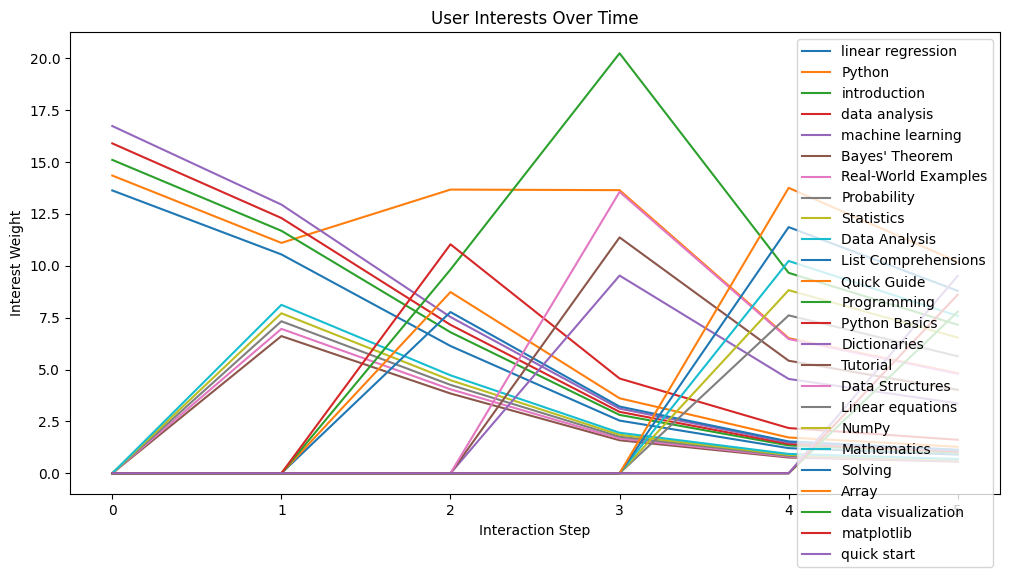

In [ ]:
import random
import matplotlib.pyplot as plt
import pandas as pd

class UserProfile:
    def __init__(self):
        """
        Initializes a new UserProfile with an empty interests dictionary,
        sets the maximum weight for any interest, probability for random content,
        decay rate, and maximum view time for normalization.
        """
        self.interests = {}
        self.max_interest_weight = 50
        self.random_content_probability = 0.5
        self.decay_rate = 0.95  # Decay factor for interests
        self.max_view_time = 300  # Assume max view time for normalization is 300 seconds (5 minutes)

    def update_interest(self, interest, likes=0, shares=0, view_time=0):
        """
        Updates the weight of a given interest based on the user's interactions
        (likes, shares, view time). It also applies decay to all interests and
        normalizes the weights if their total exceeds 100%.

        Parameters:
        - interest (str): The tag representing the interest to be updated.
        - likes (int): The number of likes for the interest.
        - shares (int): The number of shares for the interest.
        - view_time (int): The view time in seconds for the interest.
        """
        if interest not in self.interests:
            self.interests[interest] = 0

        # Normalize view time
        normalized_view_time = view_time / self.max_view_time

        # Decay existing interests
        for key in self.interests:
            self.interests[key] *= self.decay_rate

        # Update weight based on interactions
        weight_increase = (likes * 0.1) + (shares * 0.2) + (normalized_view_time * 5)
        new_weight = min(self.interests[interest] + weight_increase, self.max_interest_weight)
        self.interests[interest] = new_weight

        # Normalize weights if they exceed 100%
        total_weight = sum(self.interests.values())
        if total_weight > 100:
            scale_factor = 100 / total_weight
            for key in self.interests:
                self.interests[key] *= scale_factor

    def get_top_interests(self):
        """
        Returns a list of the top 3 interests sorted by their weights in descending order.
        """
        # Select top 3 interests
        sorted_interests = sorted(self.interests.items(), key=lambda item: item[1], reverse=True)
        top_interests = sorted_interests[:3]
        return [interest for interest, weight in top_interests]

    def should_show_random_content(self):
        """
        Returns True if random content should be shown based on a fixed probability.
        """
        return random.random() < self.random_content_probability

    def get_next_content_type(self):
        """
        Returns the next content type to display. It can be 'Random' or one of the top interests.
        """
        if self.should_show_random_content():
            return 'Random'
        else:
            return random.choice(self.get_top_interests())

# Create a new user profile instance
user_profile = UserProfile()

# Load the CSV data
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vSAE2tBAnAdXsxk9a9YClFN7MSEVhzEmJD01ewwtooMLxL-Ilod26EbdD8sZeZk0ybiqD-jqT-9RZbn/pub?gid=497214901&single=true&output=csv"
df = pd.read_csv(url)
print("Data loaded successfully")
df.head()

def simulate_interactions(df):
    """
    Simulates user interactions by adding columns for likes, shares, and view time.

    Parameters:
    - df (DataFrame): The DataFrame containing video data.

    Returns:
    - df (DataFrame): The DataFrame with added interaction columns.
    """
    df['likes'] = [random.randint(0, 100) for _ in range(len(df))]
    df['shares'] = [random.randint(0, 50) for _ in range(len(df))]
    df['view_time'] = [random.randint(0, 300) for _ in range(len(df))]  # in seconds
    return df

# Simulate interactions
df = simulate_interactions(df)
df.head()

def fetch_next_video(df):
    """
    Fetches the next video from the DataFrame, displays its details,
    and simulates interactions with it.

    Parameters:
    - df (DataFrame): The DataFrame containing video data.

    Returns:
    - video (Series): The row representing the video.
    - df (DataFrame): The DataFrame with the fetched video removed.
    """
    if df.empty:
        print("No more videos to display")
        return None, df

    video = df.iloc[0]
    df = df.iloc[1:].reset_index(drop=True)

    # Display video details
    print(f"Video ID: {video['video_id']}")
    print(f"Title: {video['video_title']}")
    print(f"Tags: {video['tags']}")
    print(f"Description: {video['description']}")
    print(f"Likes: {video['likes']}, Shares: {video['shares']}, View Time: {video['view_time']} seconds")

    return video, df

# Fetch and display the next video
video, df = fetch_next_video(df)

def update_user_profile(user_profile, video):
    """
    Updates the user profile based on the interactions with the fetched video.

    Parameters:
    - user_profile (UserProfile): The user profile object.
    - video (Series): The row representing the video.
    """
    tags = video['tags'].split(', ')
    likes = video['likes']
    shares = video['shares']
    view_time = video['view_time']

    for tag in tags:
        user_profile.update_interest(tag, likes, shares, view_time)

    print(f"Updated Interests: {user_profile.interests}")
    print(f"Top Interests: {user_profile.get_top_interests()}")

# Update the user profile with the fetched video
update_user_profile(user_profile, video)

# Prepare data for visualization
history = [user_profile.interests.copy()]

# Fetch and update for a few more videos to visualize changes
for _ in range(5):
    video, df = fetch_next_video(df)
    if video is not None:
        update_user_profile(user_profile, video)
        history.append(user_profile.interests.copy())

df_history = pd.DataFrame(history)
df_history = df_history.fillna(0)  # Fill NaN with 0 for plotting

# Plot the data
plt.figure(figsize=(12, 6))
for column in df_history.columns:
    plt.plot(df_history[column], label=column)

plt.title("User Interests Over Time")
plt.xlabel("Interaction Step")
plt.ylabel("Interest Weight")
plt.legend()
plt.show()


In [ ]:
interests = []

# probabilities
interests_random = 0.5

decay_rate = 0.95

def view_video(id, ):
    #extract video tags

    time = timeWatched/totalDuration



AI

interests = [AI]

Random

interests = [AI, random1]

